# Data Understandig

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import seaborn as sns

import matplotlib as mpl
import plotly.graph_objects as go
import scipy.stats as stats
import matplotlib.pyplot as plt
pd.set_option('display.max_row',500)
cc=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
sns.set(style="whitegrid")
mpl.rcParams['figure.figsize']= (20,9)
cc

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181574,181666,181725,181808,181912,181987,182033,182072,182149,182228
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,277141,277409,277444,277663,277940,278211,278504,278793,279077,279077
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265971,265975,265985,265993,266006,266015,266025,266030,266038,266049
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8581,8581,8581,8581,8590,8590,8625,8625,8625,8625
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9313453,9341492,9341492,9341492,9341492,9341492,9341492,9341492,9367172,9367172
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,423044,423044,423104,423104,423104,423104,423104,423104,423104,423243
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,146264,147096,147942,148996,150123,151113,152199,153012,153939,155047


In [2]:
time_index=cc.columns[4:]

In [3]:
cc_plot= pd.DataFrame({'date':time_index})
cc_plot

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
...,...
883,6/23/22
884,6/24/22
885,6/25/22
886,6/26/22


# Data Preperation

In [4]:
country_list=['Australia','Canada','Luxembourg']
for each in country_list:
    cc_plot[each]=np.array(cc[cc['Country/Region']==each].iloc[:,4:].sum(axis=0))
    cc_plot.set_index('date').plot
    cc_plot

<AxesSubplot:xlabel='date'>

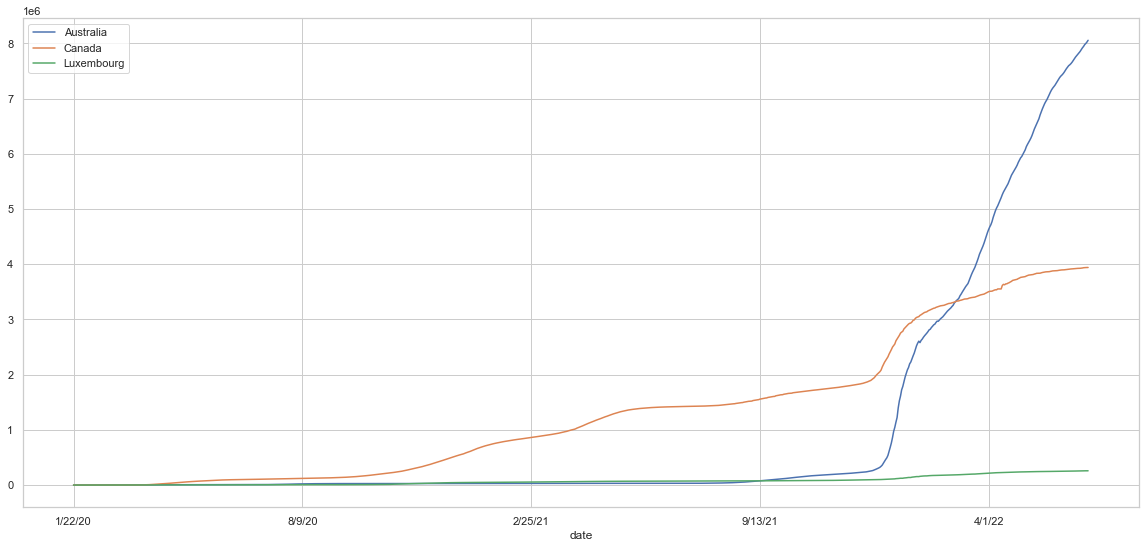

In [5]:
cc_plot.set_index('date').plot()

In [6]:
time_index2=[datetime.strptime( each,"%m/%d/%y") for each in cc_plot.date]
time_str=[each.strftime('%y-%m-%d') for each in time_index2]

In [7]:
cc_plot['date']=time_index2
type (cc_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:

cc_plot['Australia']=cc_plot['Australia']/26097902 # Australia population (Worldometers website)
cc_plot['Canada']=cc_plot['Canada']/38406680 # Canada population (Worldometers website)
cc_plot['Luxembourg']=cc_plot['Luxembourg']/646785 # Luxembourg population (Worldometers website)

In [9]:
cc_plot.to_csv('C:/Users/feras/time_series_covid19_confirmed_global1.csv',sep=';')

In [16]:
figure=go.Figure()
for country in country_list:
    figure.add_trace(go.Scatter(x=cc_plot.date, y=cc_plot[country],name=country))
    
figure.update_layout(xaxis_title="Date", yaxis_title="Absolut Covid cases/Population size")
figure.update_layout(xaxis_rangeslider_visible=True)

In [11]:
vaccination_rate = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

In [12]:
vaccination_rate

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110340,Zimbabwe,ZWE,2022-06-22,11921703.0,6289811.0,4588340.0,1043552.0,11366.0,7816.0,78.99,41.68,30.40,6.91,518.0,2587.0,0.017
110341,Zimbabwe,ZWE,2022-06-23,11990463.0,6309872.0,4616555.0,1064036.0,68760.0,16621.0,79.45,41.81,30.59,7.05,1101.0,5081.0,0.034
110342,Zimbabwe,ZWE,2022-06-24,11997938.0,6311886.0,4620396.0,1065656.0,7475.0,15979.0,79.50,41.82,30.61,7.06,1059.0,4958.0,0.033
110343,Zimbabwe,ZWE,2022-06-25,12002717.0,6313216.0,4622428.0,1067073.0,4779.0,16191.0,79.53,41.83,30.63,7.07,1073.0,5001.0,0.033


In [13]:
vaccination_rate['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

In [15]:
import plotly.graph_objects as impfung
vrc=vaccination_rate['location']=='Canada'
vrl=vaccination_rate['location']=='Luxembourg'
vra=vaccination_rate['location']=='Australia'
l_vc=vaccination_rate[vrl]
c_vc=vaccination_rate[vrc]
a_vc=vaccination_rate[vra]
impfanzahl=impfung.Figure()
impfanzahl.add_trace(impfung.Scatter(x=l_vc.date,y=l_vc.people_vaccinated/646785*100,name='Luxembourg'))
impfanzahl.add_trace(impfung.Scatter(x=c_vc.date,y=c_vc.people_vaccinated/38406680*100,name='Canada'))
impfanzahl.add_trace(impfung.Scatter(x=a_vc.date,y=a_vc.people_vaccinated/26097902*100,name='Australia'))
impfanzahl.update_layout(xaxis_title="Date", yaxis_title="vaccination rate (percentage of the population)")
